<a href="https://colab.research.google.com/github/lualua0909/DeepLearning-LDS8/blob/main/Week_4/chapter6_demo_pollution_one_to_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# LSTM for air pollution problem with regression framing
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
	#t
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
	#t+1
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
numpy.random.seed(7)

In [21]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/lualua0909/DeepLearning-LDS8/main/Data/pollution_new.csv', index_col=0)

In [22]:
dataframe.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
1/2/2010 0:00,129,-16,-4.0,1020.0,SE,1.79,0,0
1/2/2010 1:00,148,-15,-4.0,1020.0,SE,2.68,0,0
1/2/2010 2:00,159,-11,-5.0,1021.0,SE,3.57,0,0
1/2/2010 3:00,181,-7,-5.0,1022.0,SE,5.36,1,0
1/2/2010 4:00,138,-7,-5.0,1022.0,SE,6.25,2,0


In [23]:
dataset = dataframe[['pollution']]
dataset = dataset.values.astype('float32')

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [26]:
 train_size = 365 * 24 * 4 # chia theo năm
 #train_size = int(len(dataset) * 0.67) # chia theo tỷ lệ
 test_size = len(dataset) - train_size
 train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [27]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [28]:
type(trainX)

numpy.ndarray

In [29]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [30]:
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [31]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, look_back)))
model.add(Dense(1))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


##**Cách tính tham số**
LSTM = ((num_units + input_dim + 1) * num_units) * 4 = (32 + 1 + 1) * 32 * 4 = 4352

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.0001,
    patience=20,
    restore_best_weights=True
)

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY,
                    validation_data=(testX, testY),
                    epochs=50,
                    batch_size=128,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/50
274/274 [==============================] - 4s 7ms/step - loss: 0.0047 - val_loss: 8.2312e-04
Epoch 2/50
274/274 [==============================] - 1s 5ms/step - loss: 8.2786e-04 - val_loss: 6.0501e-04
Epoch 3/50
274/274 [==============================] - 1s 5ms/step - loss: 8.0826e-04 - val_loss: 6.0448e-04
Epoch 4/50
274/274 [==============================] - 1s 5ms/step - loss: 8.0579e-04 - val_loss: 6.0192e-04
Epoch 5/50
274/274 [==============================] - 1s 5ms/step - loss: 8.0300e-04 - val_loss: 6.0698e-04
Epoch 6/50
274/274 [==============================] - 1s 5ms/step - loss: 8.0049e-04 - val_loss: 5.9930e-04
Epoch 7/50
274/274 [==============================] - 1s 5ms/step - loss: 8.0134e-04 - val_loss: 6.0526e-04
Epoch 8/50
274/274 [==============================] - 1s 5ms/step - loss: 7.9903e-04 - val_loss: 6.0365e-04
Epoch 9/50
274/274 [==============================] - 1s 5ms/step - loss: 7.9459e-04 - val_loss: 6.0128e-04
Epoch 10/50
274/274 [===========

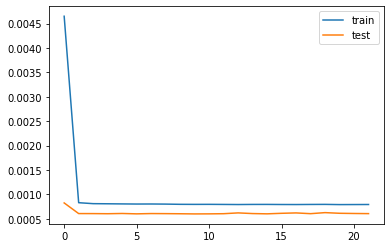

In [35]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [36]:
train_predict = model.predict(trainX)
test_predict= model.predict(testX)

In [37]:
train_predict = scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])

In [40]:
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

In [38]:
trainY[0][:5]

array([148.00000139, 158.99999549, 180.9999985 , 137.99999329,
       108.99999942])

In [39]:
train_predict[:5]

array([[124.243065],
       [142.2881  ],
       [152.78975 ],
       [173.91121 ],
       [132.77576 ]], dtype=float32)

In [41]:
train_rmse = math.sqrt(mean_squared_error(trainY[0], train_predict[:,0]))
train_rmse

28.25771317025216

In [42]:
test_rmse = math.sqrt(mean_squared_error(testY[0], test_predict[:,0]))
test_rmse

24.449338556376787

In [43]:
train_mae = mean_absolute_error(trainY[0], train_predict[:,0])
test_mae = mean_absolute_error(testY[0], test_predict[:,0])

In [46]:
#Shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict

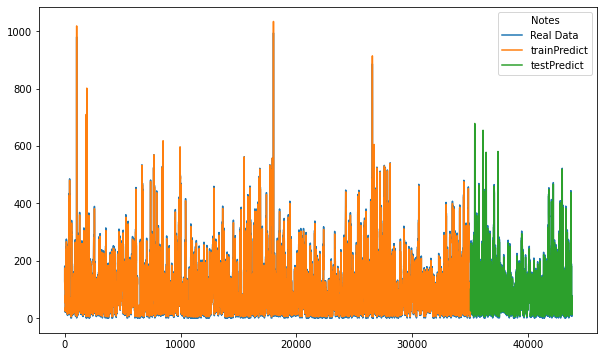

In [48]:
# plot baseline and predictions
plt.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset), label='Real Data')
plt.plot(trainPredictPlot, label='trainPredict')
plt.plot(testPredictPlot, label='testPredict')
plt.legend(title="Notes")
plt.show()

In [ ]:
``````````````